# 1. Download data from Google Play Store and set up data frame

In [1]:
#from google_play_scraper import app, Sort, reviews_all, reviews

In [5]:
#result, continuation_token = reviews(
#     'de.rki.coronawarnapp',
#     lang = 'de', # defaults to 'en'
#     country = 'de', # defaults to 'us'
#     sort = Sort.NEWEST, # defaults to Sort.MOST_RELEVANT,
#     count = 20000
# )

## Convert to Pandas Dataframe

In [11]:
#df = pd.DataFrame(result)
#df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,gp:AOqpTOGj3o9mKE0wcJI7gUvMWA96hnt6THeujGrhrZL...,Thomas Wolf,https://lh3.googleusercontent.com/a-/AOh14GgH1...,Läuft nicht rund. Ich schmeiß sie wieder runte...,3,0,1.3.0,2020-09-10 17:53:33,None,NaT
1,gp:AOqpTOHLTv_VitS-R8Oh-zQAVsYapk5hPsM2xd3ej_p...,Sylvia,https://play-lh.googleusercontent.com/-E7i_LQp...,Edit 10.09. Nach dem Neustart ging es erst. Nu...,5,19,1.3.0,2020-09-10 17:16:07,EDIT6: Danke für Ihr erneutes Feedback und Ihr...,2020-09-10 09:47:38
2,gp:AOqpTOEyYwP8GeSIo3q3kdiE8tAXxwV5LBT8wiFshA4...,Daniela Schreiber,https://play-lh.googleusercontent.com/-YQzgA7h...,Habe nun schon 2 mal meine Tests registriert u...,1,1,None,2020-09-10 17:07:06,None,NaT
3,gp:AOqpTOGJzZnDKL1q8o00b-UTi7hHNQEcw6cCXYlhDpd...,Anonym Anonym,https://play-lh.googleusercontent.com/-rCxeV2p...,Hat keine Benachrichtigung gesendet obwohl Kon...,1,0,1.3.0,2020-09-10 17:03:40,Wenn bei Ihnen die Risikoermittlung >24h nicht...,2020-09-10 10:44:15
4,gp:AOqpTOErFUqPpCQRVrgIAYz-SyD09Bl18Fd_VwX4Ytt...,Philipp Weingärtner,https://play-lh.googleusercontent.com/-5J5WloW...,Gemeinsam gegen den coronavirus ist das gut.we...,5,0,1.3.0,2020-09-10 17:02:15,None,NaT
...,...,...,...,...,...,...,...,...,...,...
19995,gp:AOqpTOEYDicO2sEJdOabBU8V7VAiqBxb_DNLxIkVu4t...,Yv,https://lh3.googleusercontent.com/-UyFf2TIWp8s...,"Samsung A8, eigentlich wichtige App, leider fu...",2,5,1.0.2,2020-06-20 16:16:27,Danke für die Rückmeldung. Dieser Fehler kann ...,2020-06-20 17:11:34
19996,gp:AOqpTOGl8LIk5bvQ-8Nmin7asYOxoKOheVJ7ArjCwtk...,Barbara Drischel,https://lh3.googleusercontent.com/a-/AOh14GgMo...,Die App läuft einwandfrei. Aber das Virus kann...,5,0,1.0.2,2020-06-20 16:16:07,None,NaT
19997,gp:AOqpTOHpOi0KJfxUI3D8CR7jjn7QVbsn52zMVymfFYO...,Yogurt Styles,https://lh3.googleusercontent.com/-X4LXIqUznN8...,"Unzufrieden damit, dass ich meinen Standort je...",1,4,None,2020-06-20 16:15:14,Danke für Ihr Feedback. Die Corona-Warn-App gr...,2020-06-23 22:54:52
19998,gp:AOqpTOE-ZUrcM7d3XAFqEatvXWKGvjFTWzESN2XOS2s...,Wolfgang Fehse,https://lh3.googleusercontent.com/-32xScOIJa_M...,Zieht viel Strom. Akku extrem schnell leer . D...,2,2,None,2020-06-20 16:12:42,Danke für Ihr Feedback. Die Corona-Warn-App nu...,2020-06-26 13:36:22


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [3]:
#df.to_csv('rki_corona.csv')
df = pd.read_csv('google_play_corona_warn_app.csv', index_col=[0])

# 2. Exploratory Data Analysis

In [4]:
df.loc[:, df.isnull().any()].columns

Index(['reviewCreatedVersion', 'replyContent', 'repliedAt'], dtype='object')

## 2.1 Version

In [5]:
df_version = df[["score", "reviewCreatedVersion"]].groupby("reviewCreatedVersion").mean()
df_version.reset_index(level=0, inplace=True)

In [4]:
df_version

,reviewCreatedVersion,score
0,1.0.0,2.865854
1,1.0.2,3.320406
2,1.0.4,3.445655
3,1.0.5,2.943271
4,1.1.1,3.097299
5,1.2.0,2.893204
6,1.2.1,2.560752
7,1.3.0,2.654300


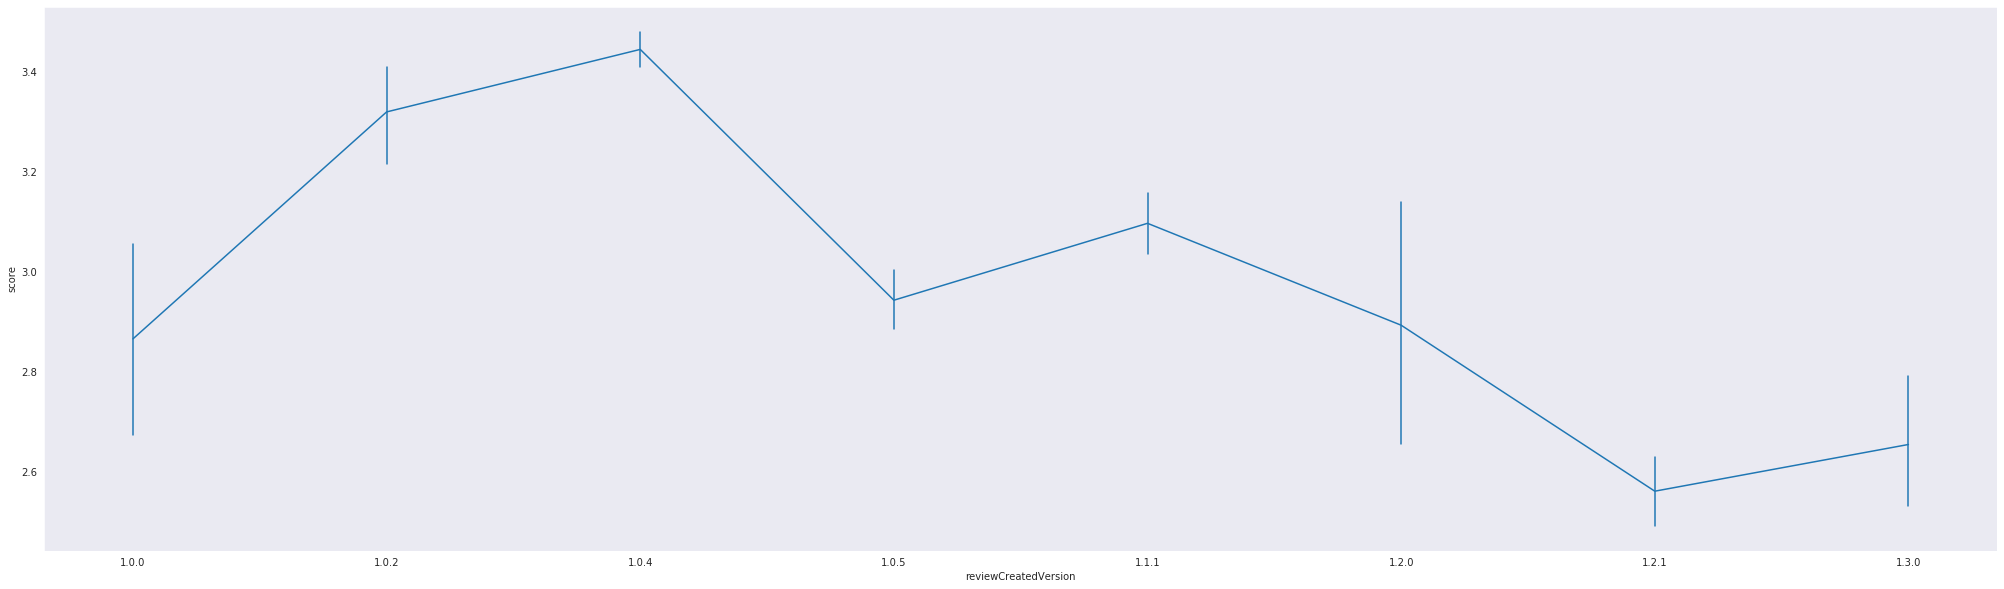

In [6]:
# Only show versions with >= 50 ratings
df_version_filter = df[["score", "reviewCreatedVersion"]].groupby("reviewCreatedVersion").describe()["score"]
df_version_filter.reset_index(level=0, inplace=True)
df_version_filter = df_version_filter[df_version_filter["count"] >= 50]

mask_version = df_version_filter["reviewCreatedVersion"]
df_version_filter = df[df["reviewCreatedVersion"].isin(mask_version)]
plt.figure(figsize=(35,10))
sns.set_style("dark")
sns.lineplot(x = "reviewCreatedVersion", y = "score", err_style = "bars", ci = 95,  palette = "flare", data = df_version_filter)

## 2.2 Scores and Upvotes

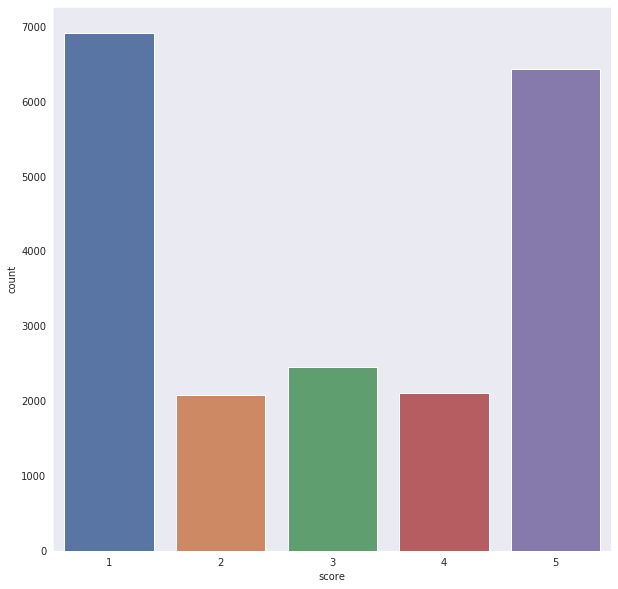

In [7]:
plt.figure(figsize=(10,10))
sns.set_style("dark")
sns.set_palette("deep")
sns.countplot(x = "score", data = df)

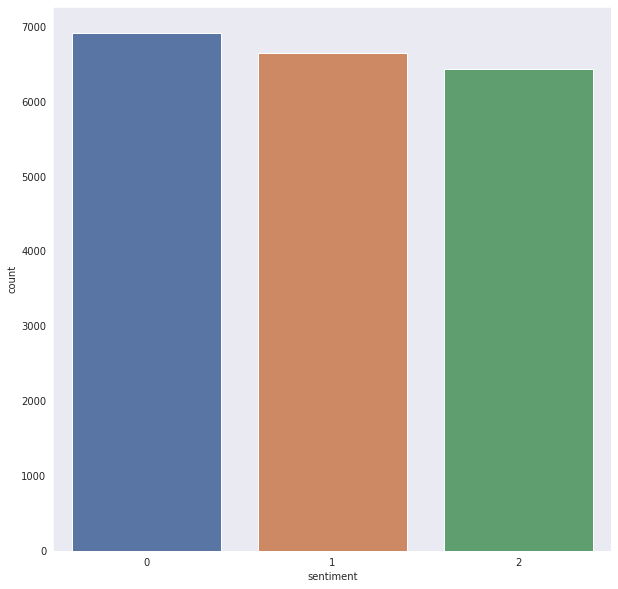

In [8]:
def to_sentiment(rating):
    rating = int(rating)
    if rating == 1:
        return 0
    elif rating >= 2 and rating <= 4:
        return 1
    else:
        return 2

df['sentiment'] = df.score.apply(to_sentiment)

plt.figure(figsize=(10,10))
sns.set_style("dark")
sns.set_palette("deep")
sns.countplot(df.sentiment)

In [9]:
df.sort_values(["score","thumbsUpCount"], ascending = False).iloc[0:5,[3,4,5,10]]

,content,score,thumbsUpCount,sentiment
7746,Solide App obwohl offenbar noch ein paar Bugs ...,5,771,2
17947,Die App tut das was sie verspricht. Anfangs ha...,5,474,2
17786,Super App! Jeder der schon einmal eine App ent...,5,356,2
9662,Gute einfach zu nutzende App. Datenschutz sehr...,5,349,2
18380,"Die App tut bei mir das was es soll, ist klar ...",5,344,2


In [10]:
df.sort_values(["score"], ascending = True).iloc[0:5,[3,4,5,10]].sort_values(["thumbsUpCount"], ascending = False)

,content,score,thumbsUpCount,sentiment
5120,Nach dem Update auf Version 1.1.1 und installi...,1,12,0
5118,Und schon wieder etwas ist schief gelaufen. Ur...,1,2,0
11872,"Ich habe das gleiche Problem, wie zig andere N...",1,1,0
10734,Direkt Fehler aber jetzt mal Butter bei die Fi...,1,0,0
10740,Hallo mit meinen Tablett in Wi-Fi geht die App...,1,0,0


In [11]:
def to_review_length(review):
    review = len(review)
    return review

df["ReviewLength"] = df.content.apply(to_review_length)

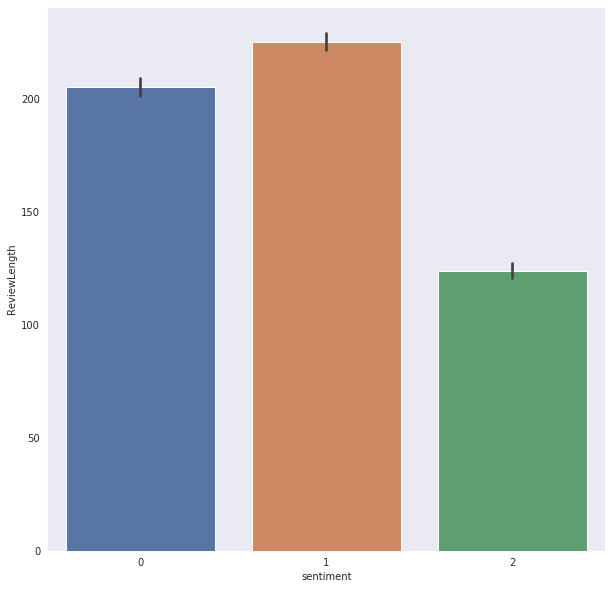

In [12]:
plt.figure(figsize=(10,10))
sns.set_style("dark")
sns.set_palette("deep")
sns.barplot(y = "ReviewLength", x = "sentiment", data = df)

## 2.3 Lemmatization

In [13]:
import treetaggerwrapper
tagger = treetaggerwrapper.TreeTagger(TAGLANG = 'de', TAGDIR = '/home/sebastian/Programme/TreeTagger/')

In [14]:
# tagger example #1
tag_ex = tagger.tag_text("Täglich grüßt das Murmeltier.", tagonly = False)

tags2 = treetaggerwrapper.make_tags(tag_ex)
tags2
tag_list = list(list(zip(*tags2))[2])
tag_list

['täglich', 'grüßen', 'die', 'Murmeltier', '.']

In [15]:
def preprocess_text(text_column):

    # replace dot to fully identify tokens
    text_long = str(text_column).replace(".", " ")
    # set dummy text for problematic rows
    if text_long == "   ":
        text_long = "Pythagoras"

    # tag sentence
    tags = tagger.tag_text(text_long, tagonly = False)
    tags2 = treetaggerwrapper.make_tags(tags)

    tag_tuple_list = []
    for element in tags2:
        if len(element) == 3:
            tag_tuple_list.append(element)
        else:
            next

    tag_list = list(list(zip(*tag_tuple_list))[2])
    
    # store in on long text variable
    text_long = ""
    for val in tag_list:
        text_long = text_long + str(val) + ' '

    # lower all characters
    tokens = text_long.split()
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower()

    # store in on long text variable
    text_long = ""
    for words in tokens: 
        text_long = text_long + words + ' '
    
    return text_long

In [16]:
# tagger exmaple #2
df_test = df.copy()
df_test.reset_index(inplace = True)
df_test = df_test.loc[5500:5520]
df_test["LemmaReview"] = df_test.content.apply(preprocess_text)
df_test.LemmaReview

5500                                          sehr gut ! 
5501                                           nicht gut 
5502                                            sehr gut 
5503    nach anfänglich schwierigkeit bei die risikoer...
5504                                  laufen einwandfrei 
5505    eine sehr sehr gut app ! 👍👍nur sie braut zieml...
5506    keine problem mit dies app täglich aktualisier...
5507    haben handy mit prepaid karte klappen es auch ...
5508    big brother sein watching you all nur lug und ...
5509                        alle super ! unverzichtbar ! 
5510                                       sein schlecht 
5511    fehler @card@ und @card@ sein beseitigt jetzt ...
5512    bei ich sein es “ fehler bei kommunikation mit...
5513                                      wieder löschen 
5514                                  laufen einwandfrei 
5515    app sein wohl in die aktuell version drauf , a...
5516                            gehen auf mein p30 prima 
5517          

In [17]:
df["LemmaReview"] = df.content.apply(preprocess_text)

## 2.4 Wordcloud

### 2.4.1 Wordclouds based on unmodified reviews

In [18]:
def to_long_string(text_column):
    # store in one long text variable
    text_long = ""
    for word in text_column:
        text_long = text_long + str(word) + ' '
    return text_long

In [19]:
review_bad = to_long_string(df[df["sentiment"] == 0].LemmaReview)
review_neutral = to_long_string(df[df["sentiment"] == 1].LemmaReview)
review_good = to_long_string(df[df["sentiment"] == 2].LemmaReview)

In [21]:
def wordcloud_spec(text, colors):

    # import modules
    from wordcloud import WordCloud
    from nltk.corpus import stopwords
    import numpy as np
    from PIL import Image
    
    # add mask
    virus_mask = np.array(Image.open("virus.png"))
    
    # stopwords
    german_stop_words = stopwords.words('german')
    stoplist = list(set(german_stop_words))
    stop_words = ["card", "tag", "card ", "app"] + stoplist
    
    # specify cloud
    specification = WordCloud(
            mask = virus_mask,
            width = 1000,
            height = 1000,
            background_color = 'white',
            colormap = colors,
            stopwords = stop_words,
            max_words = 300,
            collocations = False,
            min_font_size = 5).generate(text)

    return specification

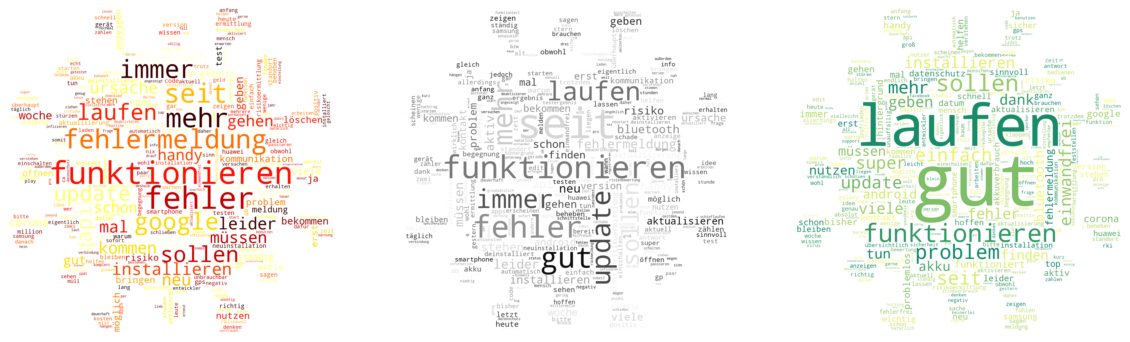

In [24]:
wordcloud_bad = wordcloud_spec(review_bad, matplotlib.cm.hot)
wordcloud_neutral = wordcloud_spec(review_neutral, matplotlib.cm.binary)
wordcloud_good = wordcloud_spec(review_good, matplotlib.cm.summer)

# plot the WordCloud image
f = plt.figure(figsize = (20,15))

f.add_subplot(1,3, 1)
plt.imshow(wordcloud_bad, interpolation = 'bilinear')
plt.axis("off")

f.add_subplot(1,3, 2)
plt.imshow(wordcloud_neutral, interpolation = 'bilinear')
plt.axis("off")

f.add_subplot(1,3, 3)
plt.imshow(wordcloud_good, interpolation = 'bilinear')
plt.axis("off")

plt.show()

### 2.4.2 Weight sentences based upon thumbs

In [25]:
df_weight = df.copy()
df_weight["thumbsUpCount"] = df_weight["thumbsUpCount"] + 1
df_weight.reindex(df_weight.index.repeat(df_weight.thumbsUpCount))
df_weight = df_weight.reindex(df_weight.index.repeat(df_weight.thumbsUpCount))
df_weight = df_weight.loc[:, ~df_weight.columns.str.match('Unnamed')]
df_weight

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sentiment,ReviewLength,LemmaReview
0,gp:AOqpTOGj3o9mKE0wcJI7gUvMWA96hnt6THeujGrhrZL...,Thomas Wolf,https://lh3.googleusercontent.com/a-/AOh14GgH1...,Läuft nicht rund. Ich schmeiß sie wieder runte...,3,1,1.3.0,2020-09-10 17:53:33,NaN,NaN,1,57,laufen nicht rund ich schmeißen sie wieder run...
1,gp:AOqpTOHLTv_VitS-R8Oh-zQAVsYapk5hPsM2xd3ej_p...,Sylvia,https://play-lh.googleusercontent.com/-E7i_LQp...,Edit 10.09. Nach dem Neustart ging es erst. Nu...,5,20,1.3.0,2020-09-10 17:16:07,EDIT6: Danke für Ihr erneutes Feedback und Ihr...,2020-09-10 09:47:38,2,370,edit @card@ @card@ nach die neustart gehen es ...
1,gp:AOqpTOHLTv_VitS-R8Oh-zQAVsYapk5hPsM2xd3ej_p...,Sylvia,https://play-lh.googleusercontent.com/-E7i_LQp...,Edit 10.09. Nach dem Neustart ging es erst. Nu...,5,20,1.3.0,2020-09-10 17:16:07,EDIT6: Danke für Ihr erneutes Feedback und Ihr...,2020-09-10 09:47:38,2,370,edit @card@ @card@ nach die neustart gehen es ...
1,gp:AOqpTOHLTv_VitS-R8Oh-zQAVsYapk5hPsM2xd3ej_p...,Sylvia,https://play-lh.googleusercontent.com/-E7i_LQp...,Edit 10.09. Nach dem Neustart ging es erst. Nu...,5,20,1.3.0,2020-09-10 17:16:07,EDIT6: Danke für Ihr erneutes Feedback und Ihr...,2020-09-10 09:47:38,2,370,edit @card@ @card@ nach die neustart gehen es ...
1,gp:AOqpTOHLTv_VitS-R8Oh-zQAVsYapk5hPsM2xd3ej_p...,Sylvia,https://play-lh.googleusercontent.com/-E7i_LQp...,Edit 10.09. Nach dem Neustart ging es erst. Nu...,5,20,1.3.0,2020-09-10 17:16:07,EDIT6: Danke für Ihr erneutes Feedback und Ihr...,2020-09-10 09:47:38,2,370,edit @card@ @card@ nach die neustart gehen es ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19997,gp:AOqpTOHpOi0KJfxUI3D8CR7jjn7QVbsn52zMVymfFYO...,Yogurt Styles,https://lh3.googleusercontent.com/-X4LXIqUznN8...,"Unzufrieden damit, dass ich meinen Standort je...",1,5,NaN,2020-06-20 16:15:14,Danke für Ihr Feedback. Die Corona-Warn-App gr...,2020-06-23 22:54:52,0,212,"unzufrieden damit , dass ich mein standort jed..."
19998,gp:AOqpTOE-ZUrcM7d3XAFqEatvXWKGvjFTWzESN2XOS2s...,Wolfgang Fehse,https://lh3.googleusercontent.com/-32xScOIJa_M...,Zieht viel Strom. Akku extrem schnell leer . D...,2,3,NaN,2020-06-20 16:12:42,Danke für Ihr Feedback. Die Corona-Warn-App nu...,2020-06-26 13:36:22,1,95,zeihen|ziehen viele strom akku extrem schnell ...
19998,gp:AOqpTOE-ZUrcM7d3XAFqEatvXWKGvjFTWzESN2XOS2s...,Wolfgang Fehse,https://lh3.googleusercontent.com/-32xScOIJa_M...,Zieht viel Strom. Akku extrem schnell leer . D...,2,3,NaN,2020-06-20 16:12:42,Danke für Ihr Feedback. Die Corona-Warn-App nu...,2020-06-26 13:36:22,1,95,zeihen|ziehen viele strom akku extrem schnell ...
19998,gp:AOqpTOE-ZUrcM7d3XAFqEatvXWKGvjFTWzESN2XOS2s...,Wolfgang Fehse,https://lh3.googleusercontent.com/-32xScOIJa_M...,Zieht viel Strom. Akku extrem schnell leer . D...,2,3,NaN,2020-06-20 16:12:42,Danke für Ihr Feedback. Die Corona-Warn-App nu...,2020-06-26 13:36:22,1,95,zeihen|ziehen viele strom akku extrem schnell ...


In [26]:
review_bad_weight = to_long_string(df_weight[df_weight["sentiment"] == 0].LemmaReview)
review_neutral_weight = to_long_string(df_weight[df_weight["sentiment"] == 1].LemmaReview)
review_good_weight = to_long_string(df_weight[df_weight["sentiment"] == 2].LemmaReview)

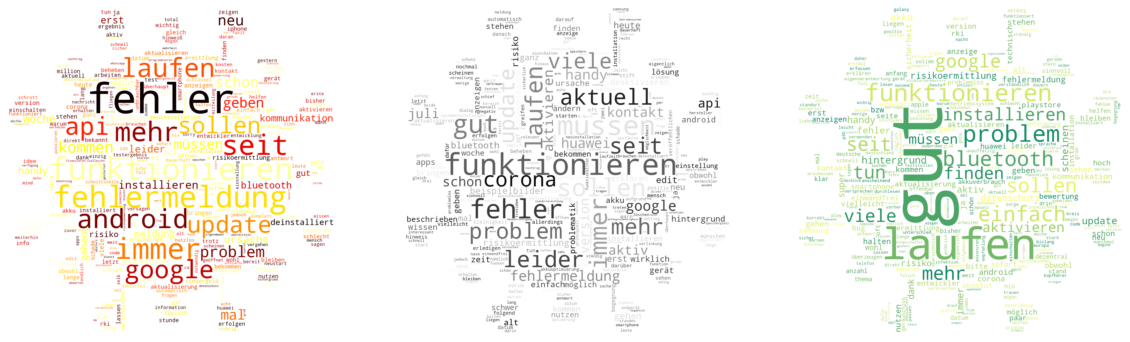

In [27]:
wordcloud_bad = wordcloud_spec(review_bad_weight, matplotlib.cm.hot)
wordcloud_neutral = wordcloud_spec(review_neutral_weight, matplotlib.cm.binary)
wordcloud_good = wordcloud_spec(review_good_weight, matplotlib.cm.summer)

# plot the WordCloud image
f = plt.figure(figsize=(20,15))

f.add_subplot(1,3, 1)
plt.imshow(wordcloud_bad, interpolation = 'bilinear')
plt.axis("off")

f.add_subplot(1,3, 2)
plt.imshow(wordcloud_neutral, interpolation = 'bilinear')
plt.axis("off")

f.add_subplot(1,3, 3)
plt.imshow(wordcloud_good, interpolation = 'bilinear')
plt.axis("off")

plt.show()

### 2.4.3 unique words

In [28]:
set_bad = set(review_bad_weight.split()) - set(review_good_weight.split()) - set(review_neutral_weight.split())
set_neutral = set(review_neutral_weight.split()) - set(review_good_weight.split()) - set(review_bad_weight.split())
set_good = set(review_good_weight.split()) - set(review_bad_weight.split()) - set(review_neutral_weight.split())

def matching(list_of_text, diff_set):
    text_long = ""
    for i in list_of_text:
        if i in diff_set:
            text_long = text_long + str(i) + " "
    return text_long

In [29]:
review_bad_unique = matching(review_bad_weight.split(), set_bad)
review_neutral_unique = matching(review_neutral_weight.split(), set_neutral)
review_good_unique = matching(review_good_weight.split(), set_good)

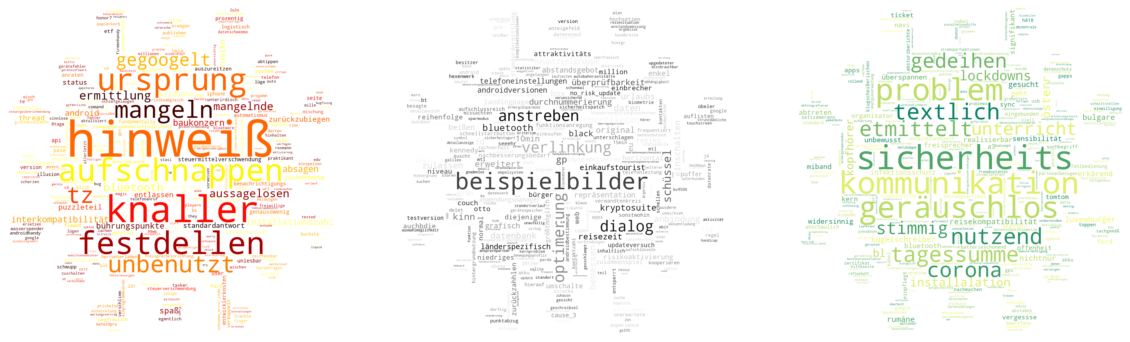

In [30]:
wordcloud_bad = wordcloud_spec(review_bad_unique, matplotlib.cm.hot)
wordcloud_neutral = wordcloud_spec(review_neutral_unique, matplotlib.cm.binary)
wordcloud_good = wordcloud_spec(review_good_unique, matplotlib.cm.summer)

# plot the WordCloud image
f = plt.figure(figsize=(20,15))

f.add_subplot(1,3, 1)
plt.imshow(wordcloud_bad, interpolation = 'bilinear')
plt.axis("off")

f.add_subplot(1,3, 2)
plt.imshow(wordcloud_neutral, interpolation = 'bilinear')
plt.axis("off")

f.add_subplot(1,3, 3)
plt.imshow(wordcloud_good, interpolation = 'bilinear')
plt.axis("off")

plt.show()

## 3. Topic modeling

In [ ]:
# https://towardsdatascience.com/topic-modeling-quora-questions-with-lda-nmf-aff8dce5e1dd?source=user_profile---------8-----------------------
# https://www.analyticsvidhya.com/blog/2018/10/mining-online-reviews-topic-modeling-lda/
# https://levelup.gitconnected.com/natural-language-processing-and-topic-modeling-on-user-review-dataset-66599beaa50e
# https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/
# https://medium.com/airy-science/gain-insights-from-customers-review-using-topic-modelling-2ae632be202b

In [52]:
# https://kavita-ganesan.com/tfidftransformer-tfidfvectorizer-usage-differences/
from sklearn.feature_extraction.text import TfidfVectorizer

# stopwords
from nltk.corpus import stopwords
german_stop_words = stopwords.words('german')
stoplist = list(set(german_stop_words))
stop_words_german = ["card", "tag", "card ", "app"] + stoplist

tfidf_vectorizer = TfidfVectorizer(
    max_df = 0.99, # max_df : maximum document frequency for the given word
    max_features = 1000, # max_features: maximum number of words
    min_df = 0.01, # min_df : minimum document frequency for the given word
    use_idf = True, # use_idf: if not true, we only calculate tf
    stop_words = stop_words_german,
    ngram_range = (1,1) # ngram_range: (min, max), eg. (1, 2) including 1-gram, 2-gram
)

In [53]:
fitted_vectorizer = tfidf_vectorizer.fit(df.LemmaReview)
tfidf_vectorizer_vectors = fitted_vectorizer.transform(df.LemmaReview)

print("In total, there are {} reviews and {} terms.".format(
    str(tfidf_vectorizer_vectors.shape[0]), str(tfidf_vectorizer_vectors.shape[1])
))

In total, there are 20000 reviews and 233 terms.


In [62]:
# https://nbviewer.jupyter.org/github/bmabey/pyLDAvis/blob/master/notebooks/sklearn.ipynb

from sklearn.decomposition import LatentDirichletAllocation

lda_tfidf = LatentDirichletAllocation(n_components = 11, random_state = 10)
lda_tfidf.fit(tfidf_vectorizer_vectors)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=11, n_jobs=None,
                          perp_tol=0.1, random_state=10, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [63]:
import pyLDAvis
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_tfidf, tfidf_vectorizer_vectors, tfidf_vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.172106 -0.112471       1        1  12.728907
2     -0.081281  0.145797       2        1  11.284133
1      0.053097 -0.032648       3        1  11.261755
10     0.036426  0.068322       4        1  10.680490
5      0.149902 -0.039306       5        1  10.197435
0      0.150964 -0.097363       6        1   9.308210
7     -0.099466  0.030526       7        1   8.862988
3      0.051217  0.006507       8        1   6.870933
6      0.062729  0.185235       9        1   6.831278
4     -0.268371 -0.170109      10        1   6.011268
8     -0.227323  0.015512      11        1   5.962604, topic_info=              Term         Freq        Total Category  logprob  loglift
195          super   416.000000   416.000000  Default  30.0000  30.0000
58         einfach   502.000000   502.000000  Default  29.0000  29.0000
91             gut  1147.000000  1147.000000  Default  28.0000  28.0000
185         sollen   813.000000   813.000000  Default  27.0000  27.0000
69          fehler   768.000000   768.000000  Default  26.0000  26.0000
..             ...          ...          ...      ...      ...      ...
122         laufen    53.503200   899.010309  Topic11  -3.9529  -0.0019
74   funktionieren    45.796026  1123.628763  Topic11  -4.1084  -0.3805
93           handy    21.159413   376.018401  Topic11  -4.8805  -0.0579
185         sollen    21.838538   813.974967  Topic11  -4.8490  -0.7986
158        problem    20.338733   529.055767  Topic11  -4.9201  -0.4389

[474 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
0         1  0.049530         ab
0         2  0.022013         ab
0         3  0.456778         ab
0         4  0.027517         ab
0         5  0.044027         ab
...     ...       ...        ...
232       4  0.445450  überhaupt
232       5  0.021907  überhaupt
232       7  0.014605  überhaupt
232       8  0.087629  überhaupt
232       9  0.087629  überhaupt

[1753 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 3, 2, 11, 6, 1, 8, 4, 7, 5, 9])